<a href='http://moncoachdata.com'><img src= 'https://moncoachdata.com/wp-content/uploads/MonCoachData-cours/MonCoachData.jpg' width=400/></a>


---


<center><em>Copyright MonCoachData (tous droits réservés)</em></center>
<center><em>Pour plus d'informations, visitez notre site <a href='http://moncoachdata.com'>moncoachdata.com</a></em></center>



---

# Régression Logistique Multi-Class

Les étudiants en Machine Learning demandent souvent comment effectuer une classification non binaire avec la régression logistique. Heureusement, le processus avec scikit-learn est à peu près le même qu'avec la classification binaire. Pour approfondir notre compréhension, nous allons passer en revue un ensemble de données simple, ainsi que voir comment utiliser LogisiticRegression avec un GridSearchCV manuel (à la place de LogisticRegressionCV). 

## Importations

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Données

Nous travaillerons avec le très connu Iris Data Set. L'ensemble de données sur les fleurs d'iris ou ensemble de données sur les iris de Fisher est un ensemble de données multivariées introduit par le statisticien, eugéniste et biologiste britannique Ronald Fisher dans son article de 1936 intitulé "The use of multiple measurements in taxonomic problems" comme un exemple d'analyse discriminante linéaire.

Informations complètes : https://en.wikipedia.org/wiki/Iris_flower_data_set

In [ ]:
df = pd.read_csv('iris.csv')

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Analyse Exploratoire de Données et Visualisation

N'hésitez pas à explorer davantage les données par vous-même.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

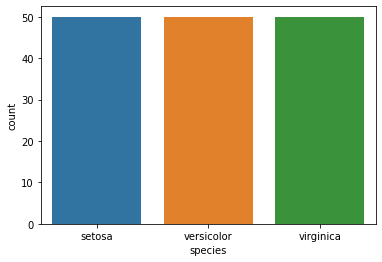

In [ ]:
sns.countplot(x=df['species']);

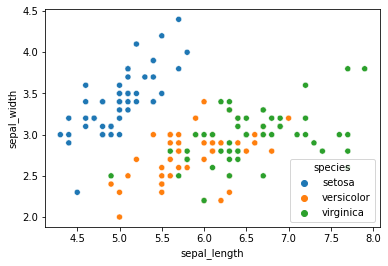

In [ ]:
sns.scatterplot(x='sepal_length',y='sepal_width',data=df,hue='species');

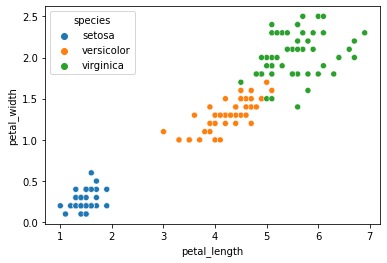

In [ ]:
sns.scatterplot(x='petal_length',y='petal_width',data=df,hue='species');

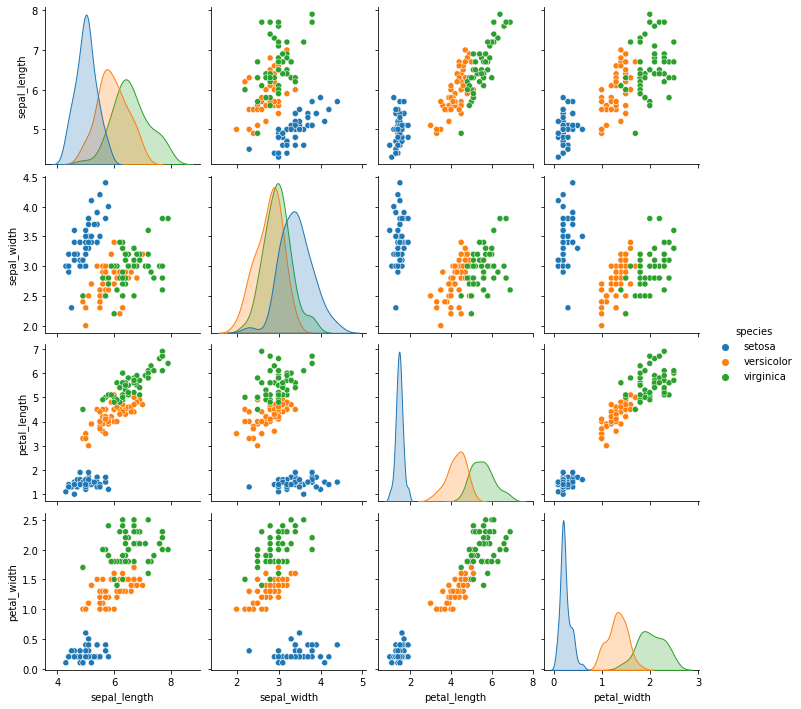

In [ ]:
sns.pairplot(df,hue='species');

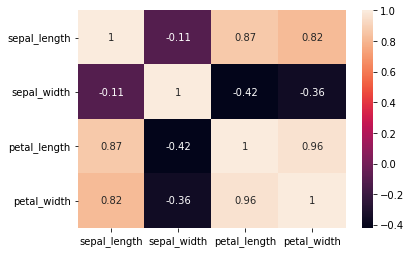

In [ ]:
sns.heatmap(df.corr(),annot=True);

Découvrez facilement de nouveaux types de graphiques en effectuant une recherche sur Google ! En recherchant "3d matplotlib scatter plot", vous arrivez rapidement sur : https://matplotlib.org/3.1.1/gallery/mplot3d/scatter3d.html

In [ ]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

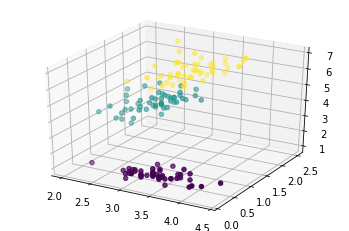

In [ ]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = df['species'].map({'setosa':0, 'versicolor':1, 'virginica':2})
ax.scatter(df['sepal_width'],df['petal_width'],df['petal_length'],c=colors);

### Train | Test Split et Scaling

In [ ]:
X = df.drop('species',axis=1)
y = df['species']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Modèle de régression logistique multi-classes

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# En fonction des avertissements, vous devrez peut-être ajuster le nombre maximum d'itérations autorisées
# Ou expérimenter avec différents solveurs
log_model = LogisticRegression(solver='saga',multi_class="ovr",max_iter=5000)

### GridSearch pour trouver les meilleurs Hyper-Parameters

Les principaux choix de paramètres sont le choix de la pénalité de régularisation et la valeur C de la régularisation.

In [ ]:
# Type de pénalité
penalty = ['l1', 'l2']

# Utilisez des valeurs C espacées logarithmiquement (recommandé dans les documents officiels)
C = np.logspace(0, 4, 10)

In [ ]:
grid_model = GridSearchCV(log_model,param_grid={'C':C,'penalty':penalty})

In [ ]:
grid_model.fit(scaled_X_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [ ]:
grid_model.best_params_

{'C': 7.742636826811269, 'penalty': 'l1'}

## Performance du modèle sur les tâches de classification

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [ ]:
y_pred = grid_model.predict(scaled_X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9736842105263158

In [ ]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 10]])

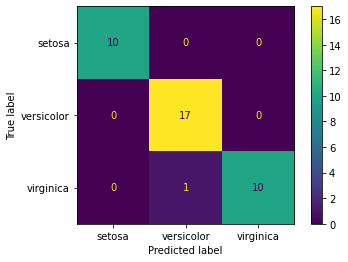

In [ ]:
ConfusionMatrixDisplay.from_estimator(grid_model,scaled_X_test,y_test);

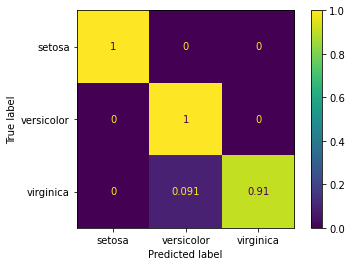

In [ ]:
# Scaled donc la valeur la plus élevée = 1
ConfusionMatrixDisplay.from_estimator(grid_model,scaled_X_test,y_test,normalize='true');

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



## Évaluation des courbes et AUC

**Assurez-vous de regarder la vidéo à ce sujet ! Nous devons créer manuellement les graphiques pour une situation multi-classes. Heureusement, la documentation de Scikit-learn contient déjà de nombreux exemples à ce sujet**.

Source : https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

Nous avons créé une fonction pour vous qui fait cela automatiquement, essentiellement en créant et en traçant une ccourbe ROC par classe.

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calcul des dummies une seule fois
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # courbe roc pour chaque classe
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('Taux de False Positive')
    ax.set_ylabel('Taux de True Positive')
    ax.set_title('Exemple de ROC')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='Courbe ROC (aire = %0.2f) pour le label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

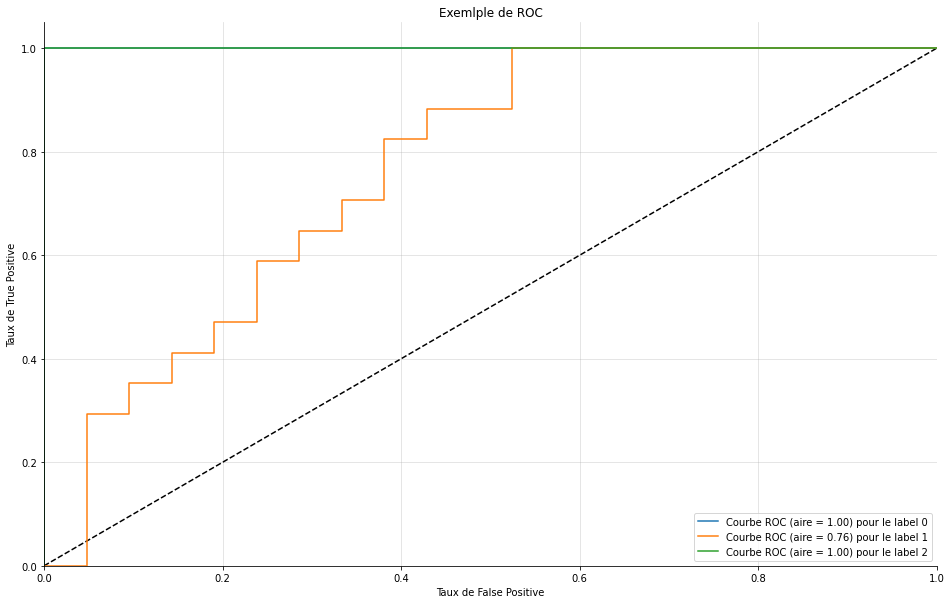

In [ ]:
plot_multiclass_roc(grid_model, scaled_X_test, y_test, n_classes=3, figsize=(16, 10))